In [147]:
# Install/Import Libs/Modules required

import os
import subprocess
import glob
import pandas as pd
from google.cloud import bigquery
from pandas_gbq import read_gbq
from datetime import datetime


In [37]:
# Get Apple & Google App Store data from GitHub Repo, then convert to Dataframe (apple and google)

# Apple
## Clone the repository
subprocess.run(["git", "clone", "https://github.com/gauthamp10/apple-appstore-apps.git"])
## Change directory to the dataset folder
os.chdir("apple-appstore-apps\dataset")
## Extract the tar.lzma file
subprocess.run(["tar", "-xvf", "appleAppData.json.tar.lzma"])

## Read into DataFrame
apple = pd.read_json("appleAppData.json")

# Google
## Clone the repository
subprocess.run(["git", "clone", "https://github.com/gauthamp10/Google-Playstore-Dataset.git"])
## Change directory to the dataset folder
os.chdir("Google-Playstore-Dataset/dataset")
## Extract all .tar.gz files
for f in os.listdir():
    if f.endswith(".tar.gz"):
        subprocess.run(["tar", "-xvf", f])
combined_csv = "Google-Playstore-Dataset.csv"
with open(combined_csv, "wb") as outfile:
    for csvfile in glob.glob("Part?.csv"):
        with open(csvfile, "rb") as infile:
            outfile.write(infile.read())

## Read into DataFrame
google = pd.read_csv("Google-Playstore-Dataset.csv", header = 0) # low_memory = False




FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Google-Playstore-Dataset/dataset'

In [143]:
# No. of records for both apple and google df
print(f"No. of Records in google repo list: {'{:,.0f}'.format(len(google))} rows")
print(f"No. of Records in apple repo list: {'{:,.0f}'.format(len(apple))} rows")

print(f"\n{google.shape[1]} Columns in google repo list:")
print(google.dtypes)

print(f"\n{apple.shape[1]} Columns in apple repo list:")
print(apple.dtypes)

No. of Records in google repo list: 2,312,944 rows
No. of Records in apple repo list: 1,230,376 rows

24 Columns in google repo list:
App Name              object
App Id                object
Category              object
Rating               float64
Rating Count         float64
Installs              object
Minimum Installs     float64
Maximum Installs       int64
Free                    bool
Price                float64
Currency              object
Size                  object
Minimum Android       object
Developer Id          object
Developer Website     object
Developer Email       object
Released              object
Last Updated          object
Content Rating        object
Privacy Policy        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Scraped Time          object
dtype: object

21 Columns in apple repo list:
App_Id                      object
App_Name                    object
AppStore_Url                object
Primary_Genre      

In [36]:
google.head(3)
# apple.head(3)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35


In [115]:
# Filtering of Records

# Condition: Rating not 0, Rating Count not 0 and Minimum Installs > 100m
google_filter1 = google[(google["Rating"] != 0) & (google["Rating Count"] != 0) & (google["Minimum Installs"] > 100000000)]

# Condition: Rating not 0, Rating Count not 0 and Minimum Installs > 10m 
google_filter2 = google[(google["Rating"] != 0) & (google["Rating Count"] != 0) & (google["Minimum Installs"] > 10000000)]

# Condition: Rating not 0, Rating Count not 0 and Minimum Installs > 1m 
google_filter3 = google[(google["Rating"] != 0) & (google["Rating Count"] != 0) & (google["Minimum Installs"] > 1000000)]

# Condition: Rating not 0, Rating Count not 0 and Minimum Installs > 100k 
google_filter4 = google[(google["Rating"] != 0) & (google["Rating Count"] != 0) & (google["Minimum Installs"] > 100000)]

# Condition: Rating not 0, Rating Count not 0 and Minimum Installs > 10k 
google_filter5 = google[(google["Rating"] != 0) & (google["Rating Count"] != 0) & (google["Minimum Installs"] > 10000)]

# To get list of App Id to scrap live info
google_live1 = pd.DataFrame({'App Id': google_filter1["App Id"]})
google_live2 = pd.DataFrame({'App Id': google_filter2["App Id"]})
google_live3 = pd.DataFrame({'App Id': google_filter3["App Id"]})
google_live4 = pd.DataFrame({'App Id': google_filter4["App Id"]})
google_live5 = pd.DataFrame({'App Id': google_filter5["App Id"]})

# Print the lengths

print(f"Original Total No. of Records in google repo list: {'{:,.0f}'.format(len(google))} rows")

print(f"\nLength of google_filter1: {'{:,.0f}'.format(len(google_live1))}, {'{:.3f}'.format((len(google_live1) / len(google)) * 100)}%")
print(f"Length of google_filter2: {'{:,.0f}'.format(len(google_live2))}, {'{:.3f}'.format((len(google_live2) / len(google)) * 100)}%")
print(f"Length of google_filter3: {'{:,.0f}'.format(len(google_live3))}, {'{:.3f}'.format((len(google_live3) / len(google)) * 100)}%")
print(f"Length of google_filter4: {'{:,.0f}'.format(len(google_live4))}, {'{:.3f}'.format((len(google_live4) / len(google)) * 100)}%")
print(f"Length of google_filter5: {'{:,.0f}'.format(len(google_live5))}, {'{:.3f}'.format((len(google_live5) / len(google)) * 100)}%")


Original Total No. of Records in google repo list: 2,312,944 rows

Length of google_filter1: 135, 0.006%
Length of google_filter2: 1,508, 0.065%
Length of google_filter3: 14,290, 0.618%
Length of google_filter4: 74,753, 3.232%
Length of google_filter5: 257,300, 11.124%


In [43]:
# Scraping of Data

!pip install google-play-scraper

from google_play_scraper import app, reviews, Sort

def app_results(app_id):
    try:
        result = app(app_id, lang='en', country='us')
        return result
    except Exception as e:
        # Handle the exception, and return a default value
        return "App not found"


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\royle\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [183]:
google_live3.head(5)

# len(google_live1)

,App Id
92,com.lf.real.extreme.suv.offroad.drive.games.free
291,com.taxsee.driver
472,com.doonung.activity
561,fast.explorer.web.browser
631,com.veitch.themelodymaster.pmf


In [168]:
# Apply the function to each element in the "App Id" column

# google_live1['App Results'] = google_live1['App Id'].apply(app_results) # 135 records, 22s
google_live2['App Results'] = google_live2['App Id'].apply(app_results) # 1508 records, 265s (4m 25s)
# google_live3['App Results'] = google_live3['App Id'].apply(app_results) # 14290 records, 2750s (45m 50s)
# google_live4['App Results'] = google_live4['App Id'].apply(app_results) (est. ~4hrs or ~240mins)
# google_live5['App Results'] = google_live5['App Id'].apply(app_results) (est. ~14hrs or ~830mins)


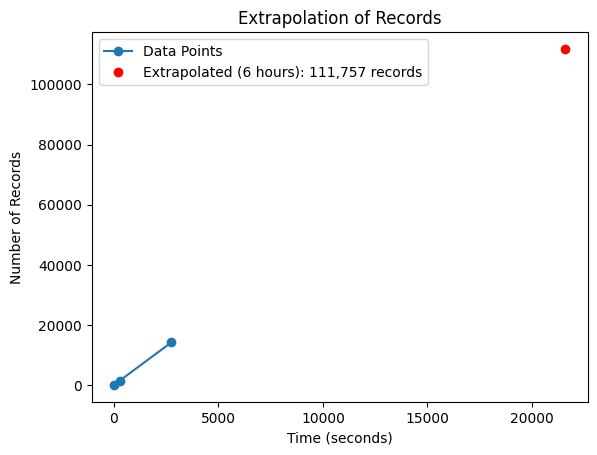

In [66]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Given data
records = [135, 1508, 14290]
seconds = [22, 265, 2750]

# Calculate records per second for each scenario
records_per_second = np.array(records) / np.array(seconds)

# Linear regression to estimate records per second
slope, intercept = np.polyfit(seconds, records, 1)

# Extrapolate for 6 hours (21600 seconds)
extrapolated_records = slope * 21600 + intercept


# Plot the line graph
plt.plot(seconds, records, 'o-', label='Data Points')
plt.plot(21600, extrapolated_records, 'ro', label=f'Extrapolated (6 hours): {"{:,.0f}".format(int(extrapolated_records))} records')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Records')
plt.title('Extrapolation of Records')
plt.legend()
plt.show()

In [181]:
google_live_selection = google_live1 # google_live1, google_live2

# Use json_normalize to split the dictionary into new columns
google_live1_cleaned = pd.json_normalize(google_live_selection['App Results']).dropna(subset=['title'])

# Print the result
len(google_live1_cleaned)
# google_live1_cleaned.columns


122

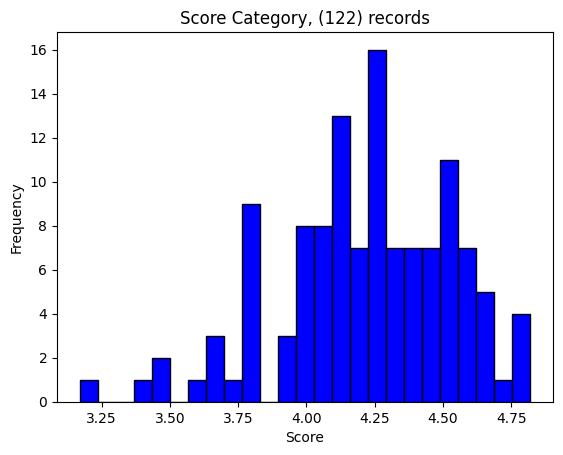

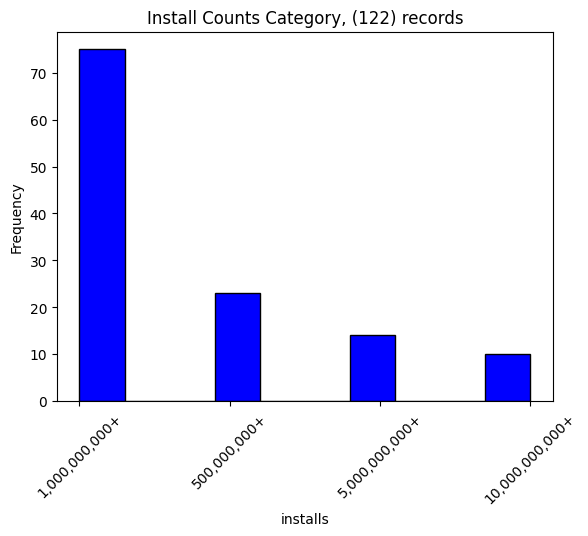

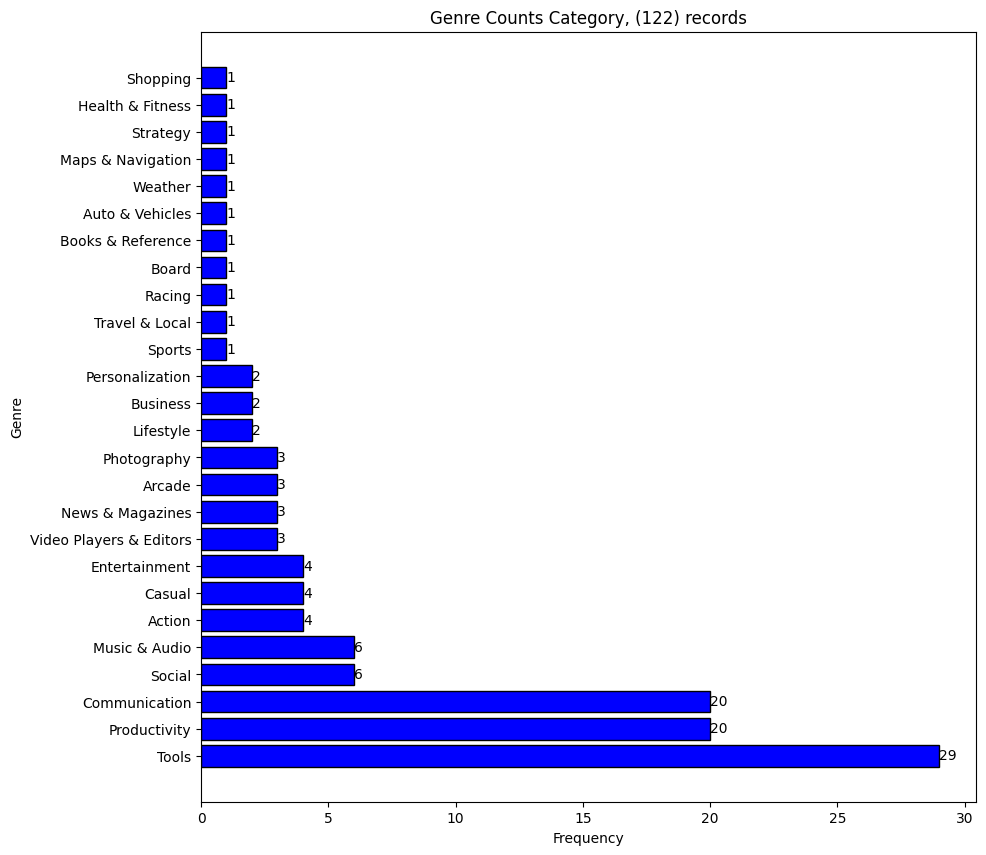

In [182]:
import matplotlib.pyplot as plt
import numpy as np

# Plot 1 - Histogram of Score

plt.hist(google_live1_cleaned['score'], bins=25, color='blue', edgecolor='black')
plt.title(f'Score Category, ({len(google_live1_cleaned)}) records')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Plot 2 - Histogram of Install Count

plt.hist(google_live1_cleaned['installs'], bins=10, color='blue', edgecolor='black')
plt.title(f'Install Counts Category, ({len(google_live1_cleaned)}) records')
plt.xlabel('installs')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plot 3 - Horizontal Bar Chart of Genre

genre_counts = google_live1_cleaned['genre'].value_counts()
plt.figure(figsize=(10, 10))

plt.barh(genre_counts.index, genre_counts, color='blue', edgecolor='black')
for index, value in enumerate(genre_counts):
    plt.text(value, index, str(value), ha='left', va='center')
plt.title(f'Genre Counts Category, ({len(google_live1_cleaned)}) records')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()
